### **Customer Purchasing Pattern Study Based on Historical Data**
**Contributors**: Qianrong Wen, Ting-Ann Lu, Risheng Guo, 
Luke Hong, Kexi Pi, Yesol Lee (Sally)


**Business Problem**
The main purpose of this project is to find relationships between customers’ characteristics and the amount they spend at a retail store. To meet this goal, we will study customers’ purchasing patterns in various aspects such as marital status, income, education, etc, and create a customer persona.  On top of that, we will evaluate the efficiency of marketing channels from deals to catalog, namely to see which channel would be the most effective to our main customers.

**Data Source**:
This dataset was provided by Dr. Romero-Hernandex, a professor at UC Berkeley and Hult International Business School. We assume the company, actual source of data, requested to be anonymous.
https://www.kaggle.com/jackdaoud/marketing-data

## 1. Loading and Preparing Data



### Overview

In [ ]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yesol-ba/portfolio/main/marketing_data.csv')

In [ ]:
df.shape

(2240, 28)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


The dataset has **2240 rows and 28 columns**. Columns can be divided into 3 groups. The first group is customer information which includes the year of birth, education, income, etc. The second group is purchase records such as the amount spent on each product category. The third group is marketing-related columns such as the number of purchases by each channel and accepted campaigns.

Column Details:


1. ID: Customer's Unique Identifier
2. Year_Birth: Customer's Birth Year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. MntWines: Amount spent on wine in the last 2 years
11. MntFruits: Amount spent on fruits in the last 2 years
12. MntMeatProducts: Amount spent on meat in the last 2 years
13. MntFishProducts: Amount spent on fish in the last 2 years
14. MntSweetProducts: Amount spent on sweets in the last 2 years
15. MntGoldProds: Amount spent on gold in the last 2 years
16. NumDealsPurchases: Number of purchases made with a discount
17. NumWebPurchases: Number of purchases made through the company's web site
18. NumCatalogPurchases: Number of purchases made using a catalogue
19. NumStorePurchases: Number of purchases made directly in stores
20. NumWebVisitsMonth: Number of visits to company's web site in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
23. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 if customer complained in the last 2 years, 0 otherwise
28. Country: Customer's location

### Data preparation

In [ ]:
# check column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

The column income has a empty space in the column name and data type is object. Cleaning this column has two steps


*   clean the column name
*   transform from object to numeric data



In [ ]:
# clean column name
df.columns = df.columns.str.replace(' ', '')

In [ ]:
# clean data type
# first remove "$"" and ","" from income data
df["Income"] = df["Income"].str.replace("$", "")
df["Income"] = df["Income"].str.replace(",", "")

# transfrom to float
df["Income"] = df["Income"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Check missing values

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
# There are 24 mssing values in income column. Fill missing values with median
df["Income"] = df["Income"].fillna(df["Income"].median())

In addition, Dt_Customer column is also object and it needs to be transformed as datetime.

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Next, we checked outliers to find if there are impossible records. We used boxplots for this step.

In [ ]:
# In this step we only used quantitative columns

check_outliers = ["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits",
                  "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                  "NumCatalogPurchases", "NumDealsPurchases","NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

print(len(check_outliers))

16


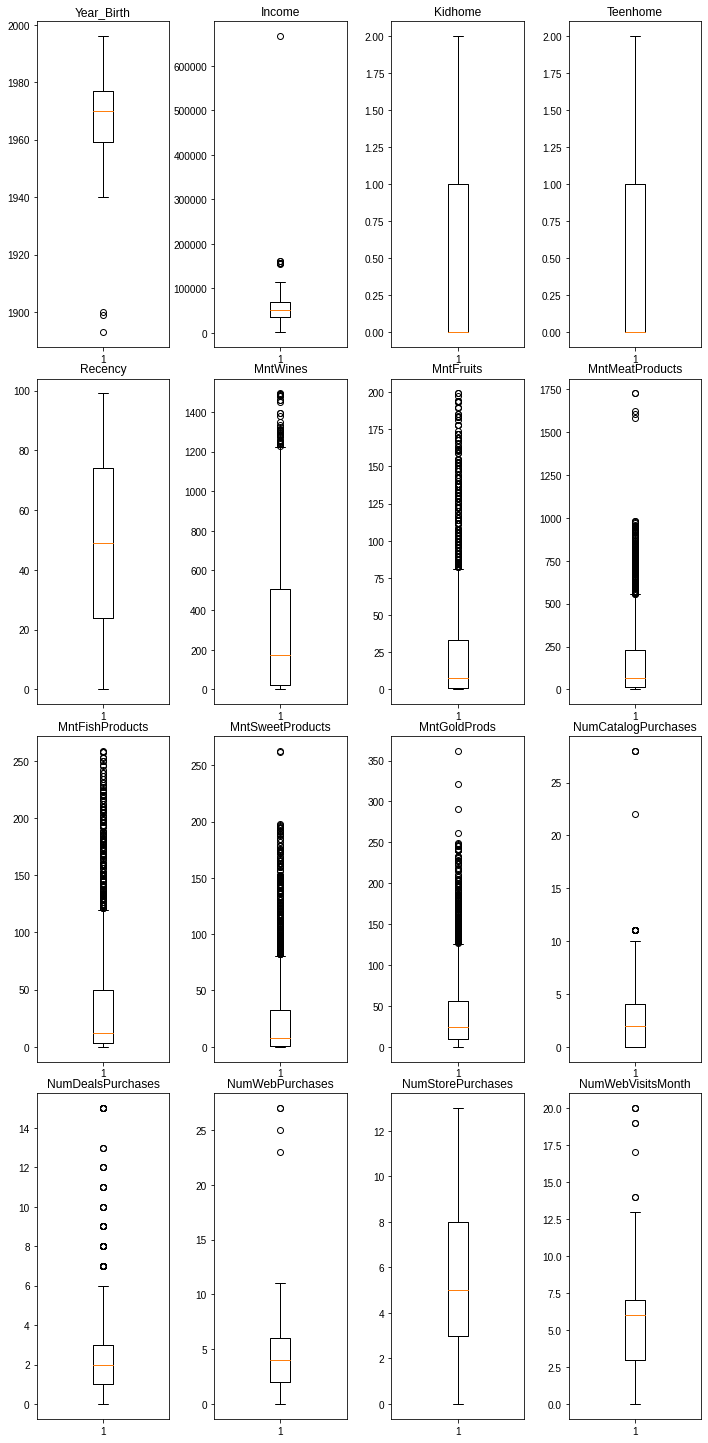

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (10, 20))
plt.tight_layout()


i = 0
j = 0

for col in check_outliers:
  plt.style.use("seaborn-darkgrid")
  ax[i, j].boxplot(df[col])
  ax[i, j].set_title(col)

  j += 1

  if j == 4:
    i += 1
    j = 0

As you can see in the plots, Year_Birth column has data 1900 or under 1900. It is not possible that customers born earlier than 1900 are still alive. Therefore we can drop these 3 rows.

In [ ]:
df[df["Year_Birth"] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND


In [ ]:
df = df[df["Year_Birth"] > 1900]
df.shape

(2237, 28)

The rest of columns have outliers but these data are still possible. So no additional procedure is needed.

Then, let's take a look at categorical data. Our team used bar plot this time.

In [ ]:
check_cat_data = []
for col in df.columns:
  if col not in check_outliers:
    check_cat_data.append(col)

check_cat_data.remove("ID")
check_cat_data.remove("Dt_Customer")
print(check_cat_data)
print(len(check_cat_data))

['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']
10


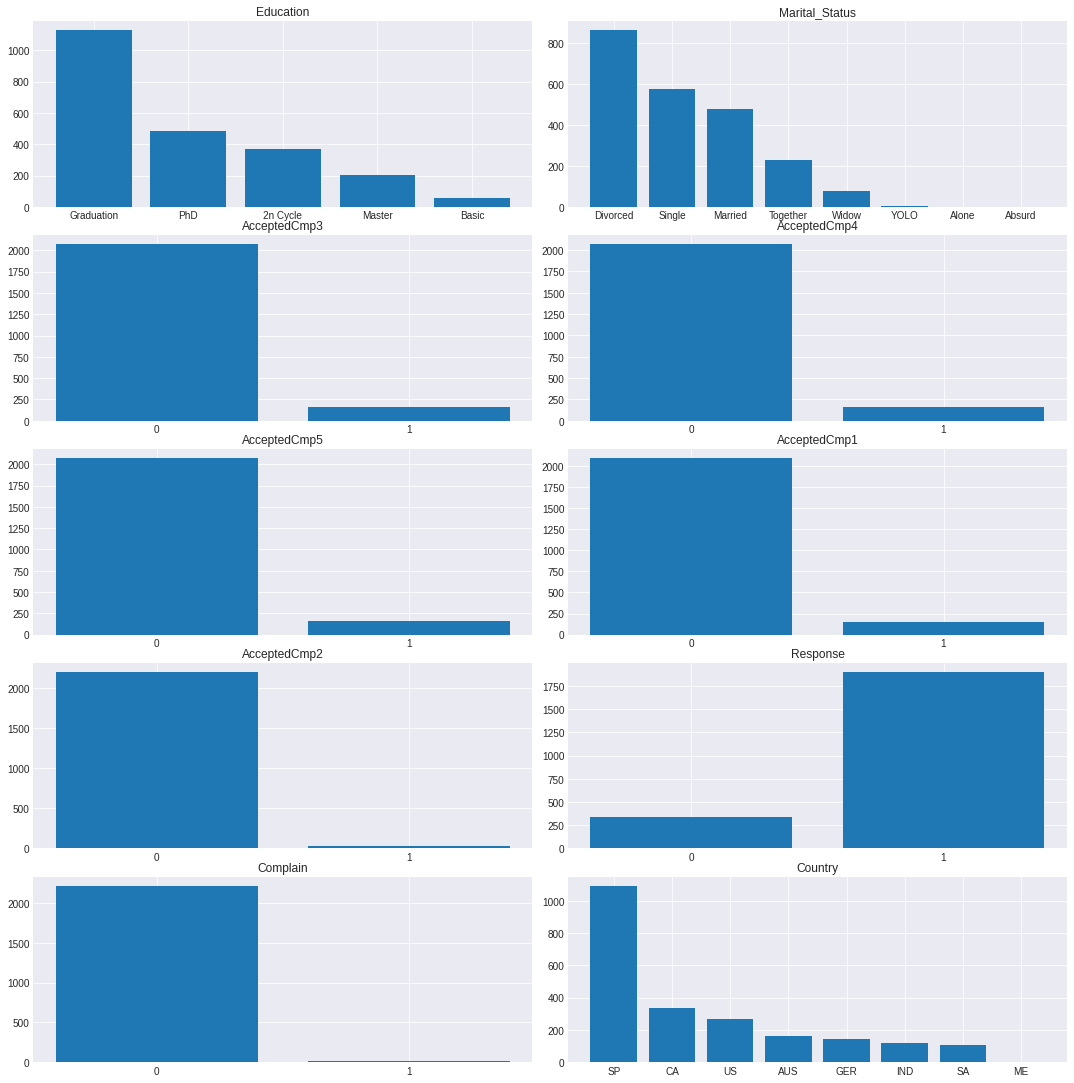

In [ ]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.tight_layout()


i = 0
j = 0

for col in check_cat_data:
  plt.style.use("seaborn-darkgrid")
  ax[i, j].bar(df[col].unique(), df[col].value_counts(), tick_label=list(df[col].unique()))
  ax[i, j].set_title(col)

  j += 1

  if j == 2:
    i += 1
    j = 0


The Education column and Marital_Status column need some modification.

Regarding education column, we found '2nd Cycle Education' coresponds with Master's degree in european countries. We therefore, changed '2nd Cycle' to 'Master'

In [ ]:
# replace 2nd cycle -> master
df.replace(to_replace ="2n Cycle", value ="Master", inplace=True)

<BarContainer object of 4 artists>

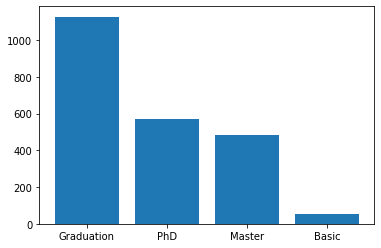

In [ ]:
plt.bar(df["Education"].unique(), df["Education"].value_counts())


When we investigated Marital_Status, data YOLO, Alone and Absurd also mean single.

<BarContainer object of 5 artists>

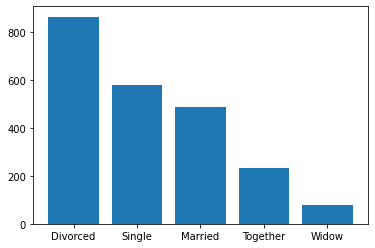

In [ ]:
df.replace(to_replace = ["YOLO", "Alone", "Absurd"], value="Single", inplace=True)
plt.bar(df["Marital_Status"].unique(), df["Marital_Status"].value_counts())

Finally we added two new columns called age and total_Mnt

In [ ]:
df["Age"] = 2020 - df['Year_Birth']
df["Total_Mnt"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

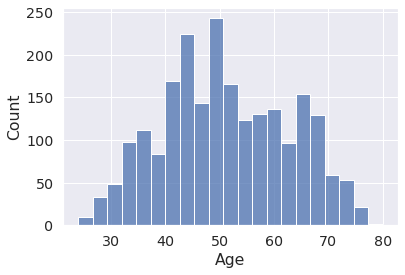

In [ ]:
sns.histplot(data=df,x='Age')

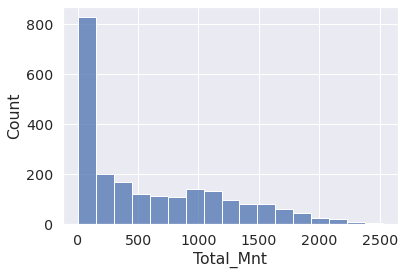

In [ ]:
sns.histplot(data=df,x='Total_Mnt')

Throughout this project, our team will find the average customer persona then we will also build a model to predict the total amount this average persona would spend.

## 2. Exploratory Data Analysis




### Correlation between columns

Before starting EDA, we wanted to check which columns are correlated with the target variable.

In [ ]:
df_short = df.drop(["MntFishProducts", "Mnt"])

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

KeyError: ignored

### Kids and Teens

Here we look at grpah features of the Num of Kids + teens from two dimensions:
(1) How the numbers of kids and teens are related to the total spending;
(2) How the numbers of kids and teens are related to other explanatory vatiables.

**How the numbers of kids and teens are related to the total spending, namely predicted variable**

In [ ]:
df['children'] = df['Kidhome'] + df['Teenhome'] # Aaron Test for persona, will delete later

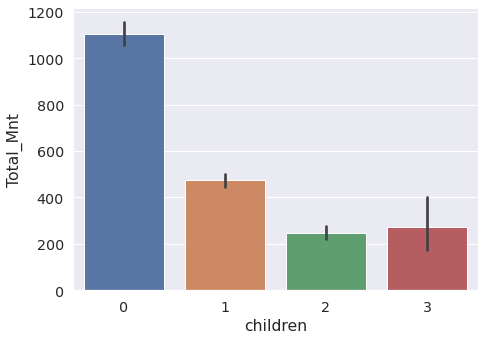

In [ ]:
sns.catplot(x='children',y='Total_Mnt',kind='bar',data=df,height=5.0,aspect=1.4) # Aaron Test for persona, will delete later

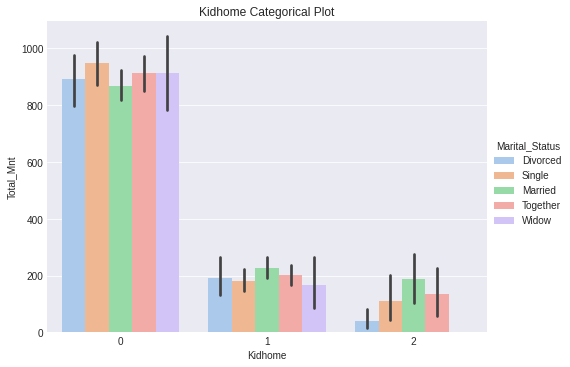

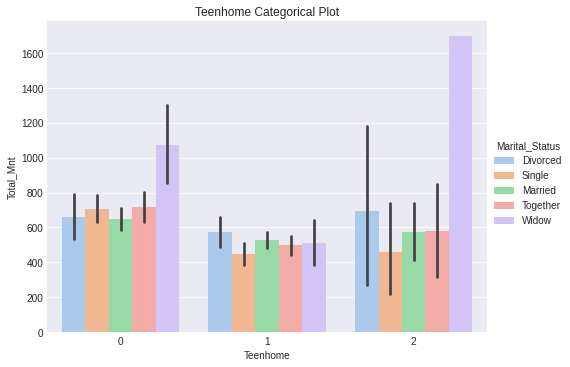

In [ ]:
mn=sns.catplot(x="Kidhome", y="Total_Mnt", hue="Marital_Status", kind="bar",palette="pastel", data=df, height=5.0, aspect=1.4).set(title='Kidhome Categorical Plot')
mm=sns.catplot(x="Teenhome", y="Total_Mnt", hue="Marital_Status", kind="bar",palette="pastel", data=df, height=5.0, aspect=1.4).set(title='Teenhome Categorical Plot')

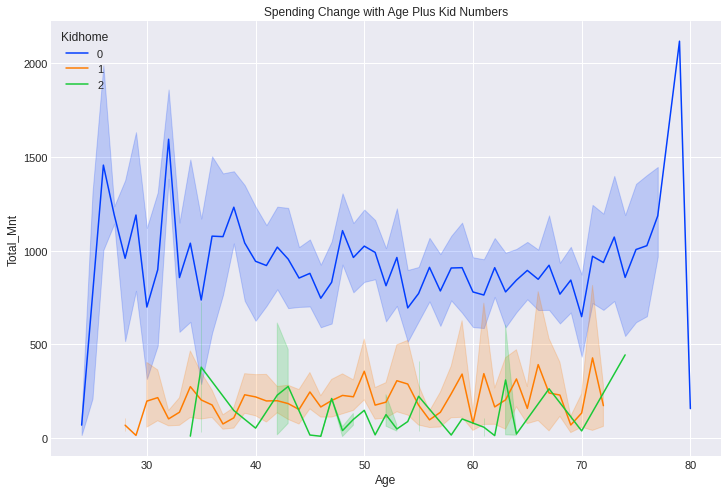

In [ ]:
plt.figure(figsize=(12,8))
kk=sns.lineplot(x='Age',y='Total_Mnt',data=df,hue='Kidhome',dashes=False,palette='bright',err_style='band').set(title='Spending Change with Age Plus Kid Numbers')

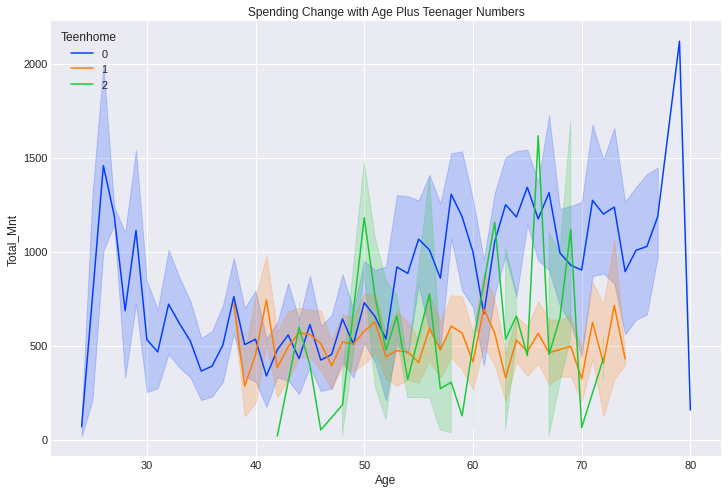

In [ ]:
plt.figure(figsize=(12,8))
kk=sns.lineplot(x='Age',y='Total_Mnt',data=df,hue='Teenhome',dashes=False,palette='bright',err_style='band').set(title='Spending Change with Age Plus Teenager Numbers')

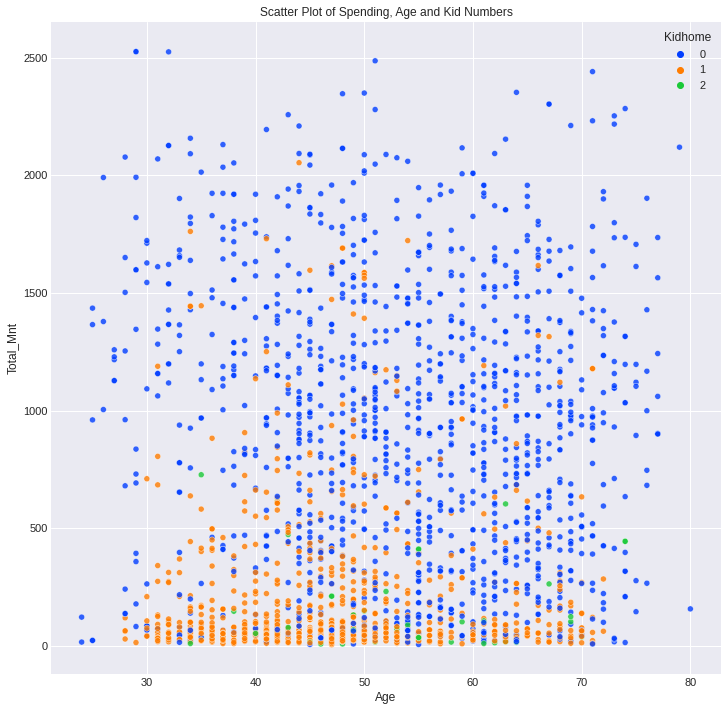

In [ ]:
plt.figure(figsize=(12,12))
nk=sns.scatterplot(x='Age',y='Total_Mnt',data=df,hue='Kidhome',palette='bright',alpha=0.8).set(title='Scatter Plot of Spending, Age and Kid Numbers')

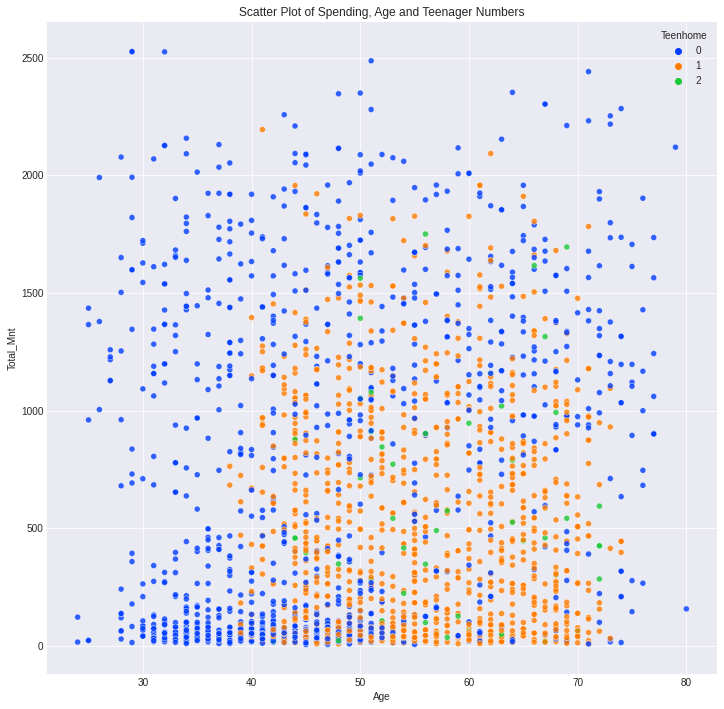

In [ ]:
plt.figure(figsize=(12,12))
jk=sns.scatterplot(x='Age',y='Total_Mnt',data=df,hue='Teenhome',palette='bright',alpha=0.8).set(title='Scatter Plot of Spending, Age and Teenager Numbers')

**How the numbers of kids and teens are related to other explanatory vatiables**

<Figure size 576x576 with 0 Axes>

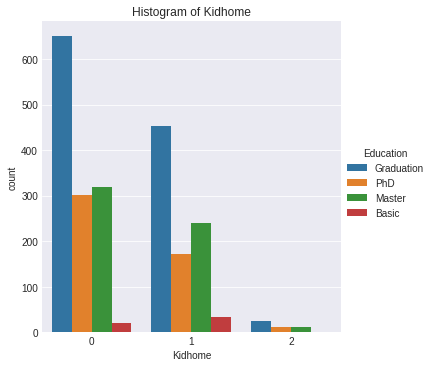

<Figure size 576x576 with 0 Axes>

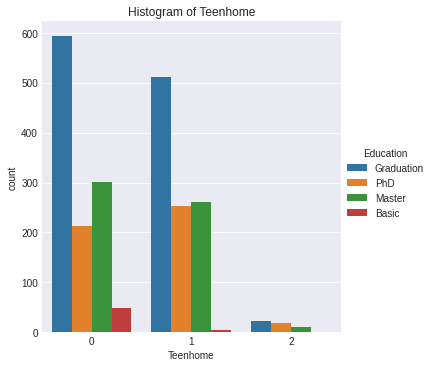

In [ ]:
plt.figure(figsize=(8,8))
f1=pp=sns.catplot(x="Kidhome",hue='Education',data=df,kind='count').set(title='Histogram of Kidhome')

plt.figure(figsize=(8,8))
f2=sns.catplot(x="Teenhome",hue='Education',data=df,kind='count').set(title='Histogram of Teenhome')

### Income

Firstly, we divide income into three levels from low, medium to high using 0-0.25, 0.25-0.75, 0.75+ quantiles.

In [ ]:
lowinco = df[df['Income'] < df['Income'].quantile(0.25)]
midinco = df[(df['Income'] >= df['Income'].quantile(0.25)) & (df['Income'] <= df['Income'].quantile(0.75))]
hiinco = df[df['Income'] > df['Income'].quantile(0.75)]

**Income Distribution**

In [ ]:
inco = df['Income']

In [ ]:
df['Income'].quantile(0.1)

24215.0

In [ ]:
df['Income'].quantile(0.9)

79776.6

In [ ]:
income_df = df[df['Income'] < 500000]

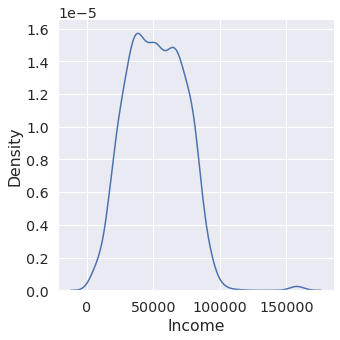

In [ ]:
sns.displot(income_df,x='Income',kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


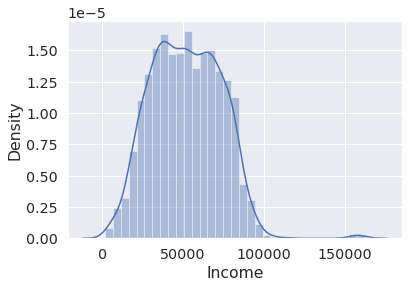

In [ ]:
sns.distplot(income_df['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


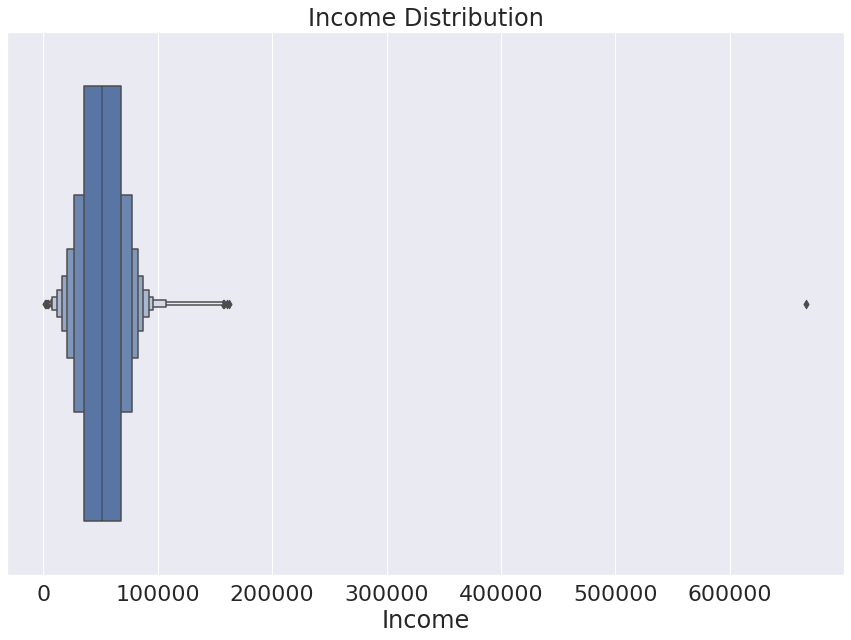

In [ ]:
fig, ax = plt.subplots(figsize=(15,10));
sns.set(font_scale=2)
sns.boxenplot(inco, ax = ax).set_title('Income Distribution');

**Preferred Product Categories by Income Level**

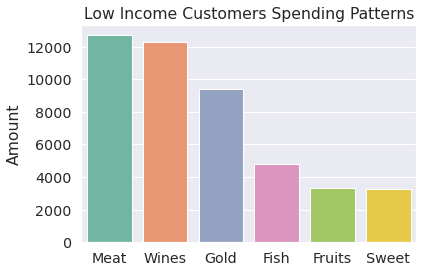

In [ ]:
l = lowinco[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 0).sort_values(ascending=False).to_frame()
l.rename(index=
{"MntWines": "Wines",
"MntFruits": "Fruits",
"MntMeatProducts": "Meat",
"MntFishProducts": "Fish",
"MntSweetProducts": "Sweet",
"MntGoldProds": "Gold"},inplace = True)
l.columns = ['Amount']
sns.set(font_scale = 1.3)
sns.barplot(x = l.index, y = 'Amount', data = l, palette= 'Set2').set(title='Low Income Customers Spending Patterns');

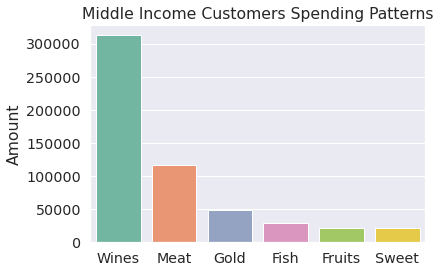

In [ ]:
m = midinco[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 0).sort_values(ascending=False).to_frame()
m.rename(index=
{"MntWines": "Wines",
"MntFruits": "Fruits",
"MntMeatProducts": "Meat",
"MntFishProducts": "Fish",
"MntSweetProducts": "Sweet",
"MntGoldProds": "Gold"},inplace = True)
m.columns = ['Amount']
sns.barplot(x = m.index, y = 'Amount', data = m, palette= 'Set2').set(title='Middle Income Customers Spending Patterns');

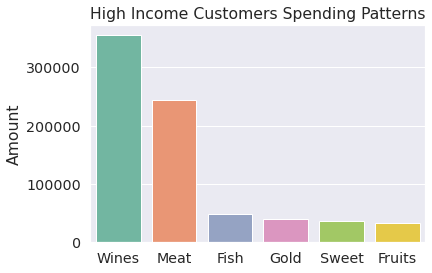

In [ ]:
h = hiinco[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 0).sort_values(ascending=False).to_frame()
h.rename(index=
{"MntWines": "Wines",
"MntFruits": "Fruits",
"MntMeatProducts": "Meat",
"MntFishProducts": "Fish",
"MntSweetProducts": "Sweet",
"MntGoldProds": "Gold"},inplace = True)
h.columns = ['Amount']
sns.barplot(x = h.index, y = 'Amount', data = h, palette= 'Set2').set(title='High Income Customers Spending Patterns');

**Channel Analysis by Income Level**

In [ ]:
ld = lowinco[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 0).tolist()
md = midinco[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 0).tolist()
hd = hiinco[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 0).tolist()
labels = ['Deals','Web','Catalog','Store']
colors = sns.color_palette('Set2')

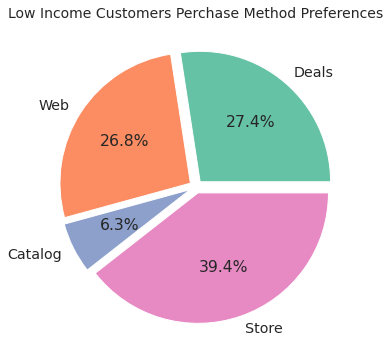

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=ld, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.6,colors=colors)
plt.title("Low Income Customers Perchase Method Preferences", fontsize=14);

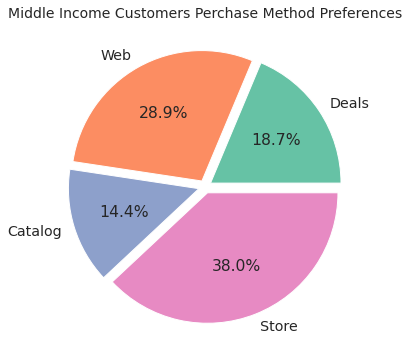

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=md, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.6,colors=colors)
plt.title("Middle Income Customers Perchase Method Preferences", fontsize=14);

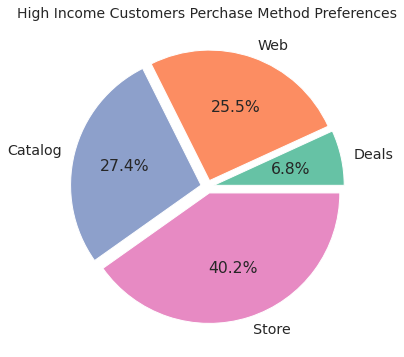

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=hd, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.6,colors=colors)
plt.title("High Income Customers Perchase Method Preferences", fontsize=14);

**Campaign Results by Income Level**

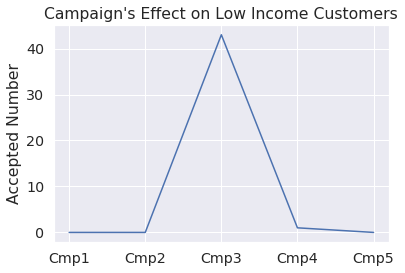

In [ ]:
cl = lowinco[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis = 0).to_frame()
cl.rename(index=
{"AcceptedCmp3": "Cmp3",
"AcceptedCmp4": "Cmp4",
"AcceptedCmp5": "Cmp5",
"AcceptedCmp1": "Cmp1",
"AcceptedCmp2": "Cmp2"},inplace = True)
cl.columns = ['Accepted Number']
sns.set(font_scale = 1.3)
sns.lineplot(x = cl.index, y = 'Accepted Number', data = cl, palette= 'Set2').set(title="Campaign's Effect on Low Income Customers");

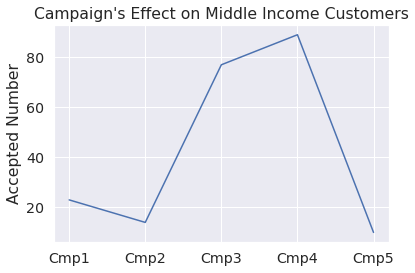

In [ ]:
ml = midinco[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis = 0).to_frame()
ml.rename(index=
{"AcceptedCmp3": "Cmp3",
"AcceptedCmp4": "Cmp4",
"AcceptedCmp5": "Cmp5",
"AcceptedCmp1": "Cmp1",
"AcceptedCmp2": "Cmp2"},inplace = True)
ml.columns = ['Accepted Number']
sns.set(font_scale = 1.3)
sns.lineplot(x = ml.index, y = 'Accepted Number', data = ml, palette= 'Set2').set(title="Campaign's Effect on Middle Income Customers");

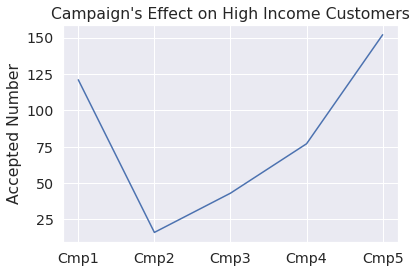

In [ ]:
hl = hiinco[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis = 0).to_frame()
hl.rename(index=
{"AcceptedCmp3": "Cmp3",
"AcceptedCmp4": "Cmp4",
"AcceptedCmp5": "Cmp5",
"AcceptedCmp1": "Cmp1",
"AcceptedCmp2": "Cmp2"},inplace = True)
hl.columns = ['Accepted Number']
sns.set(font_scale = 1.3)
sns.lineplot(x = hl.index, y = 'Accepted Number', data = hl, palette= 'Set2').set(title="Campaign's Effect on High Income Customers");

### Marketing Campaign & Channels

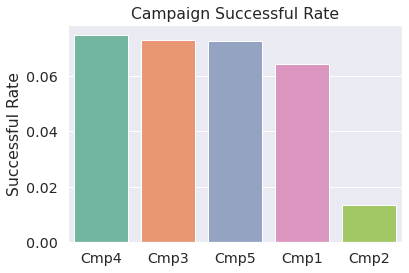

In [ ]:
hl = df[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']].sum(axis = 0).sort_values(ascending=False).to_frame()
hl = hl/len(df['AcceptedCmp3'])
hl.rename(index=
{"AcceptedCmp3": "Cmp3",
"AcceptedCmp4": "Cmp4",
"AcceptedCmp5": "Cmp5",
"AcceptedCmp1": "Cmp1",
"AcceptedCmp2": "Cmp2"},inplace = True)
hl.columns = ['Successful Rate']
sns.set(font_scale = 1.3)
sns.barplot(x = hl.index, y = 'Successful Rate', data = hl, palette= 'Set2').set(title="Campaign Successful Rate");

In [ ]:
df[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']].sum(axis = 0).sort_values(ascending=False).to_frame()

,0
AcceptedCmp4,167
AcceptedCmp3,163
AcceptedCmp5,162
AcceptedCmp1,144
AcceptedCmp2,30


In [ ]:
Accept = pd.DataFrame()

In [ ]:
Accept['CurrentCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 

In [ ]:
Accept['Response'] = df['Response']

0    33266
dtype: int64


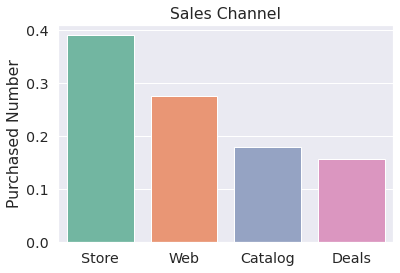

In [ ]:
hl = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 0).sort_values(ascending=False).to_frame()
sum = hl.sum()
print(sum)
hl = hl/sum
hl.columns = ['Purchased Number']
hl.rename(index=
{"NumDealsPurchases": "Deals",
"NumWebPurchases": "Web",
"NumCatalogPurchases": "Catalog",
"NumStorePurchases": "Store"},inplace = True)
sns.set(font_scale = 1.3)
sns.barplot(x = hl.index, y = 'Purchased Number', data = hl, palette= 'Set2').set(title="Sales Channel");

Text(0.5, 1.0, 'Orders Levels by Country')

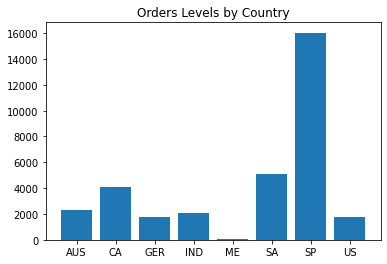

In [ ]:
df2 = df.groupby("Country").agg(
  NumDealsPurchases=pd.NamedAgg(column='NumDealsPurchases', aggfunc='sum'),
  NumWebPurchases=pd.NamedAgg(column='NumWebPurchases', aggfunc='sum'),
  NumCatalogPurchases=pd.NamedAgg(column='NumCatalogPurchases', aggfunc='sum'),
  NumStorePurchases=pd.NamedAgg(column='NumStorePurchases', aggfunc='sum'),
  NumWebVisitsMonth=pd.NamedAgg(column='NumWebVisitsMonth', aggfunc='sum'))
df2 = df2.reset_index()
plt.bar(df2["Country"].unique(), df2[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 1))
plt.title('Orders Levels by Country')

Text(0.5, 1.0, 'Income Levels by Country')

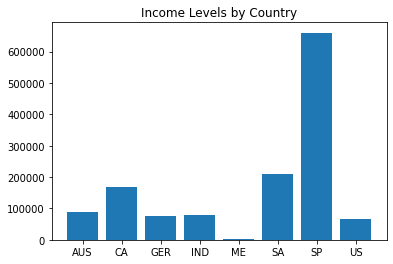

In [ ]:
df3 = df.groupby("Country").agg(
  MntWines=pd.NamedAgg(column='MntWines', aggfunc='sum'),
  MntFruits=pd.NamedAgg(column='MntFruits', aggfunc='sum'),
  MntMeatProducts=pd.NamedAgg(column='MntMeatProducts', aggfunc='sum'),
  MntFishProducts=pd.NamedAgg(column='MntFishProducts', aggfunc='sum'),
  MntSweetProducts=pd.NamedAgg(column='MntSweetProducts', aggfunc='sum'),
  MntGoldProds=pd.NamedAgg(column='MntGoldProds', aggfunc='sum'))
df3 = df3.reset_index()
plt.bar(df3["Country"].unique(), df3[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 1))
plt.title('Income Levels by Country')

In [ ]:
df3[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(

SyntaxError: ignored

### Education

**Overview of the Relationship Between Income and Education Levels**

In [ ]:
Graduate_df = df.loc[df['Education'] == 'Graduation', 'Income'].to_frame().rename(columns={"Income": "Graduation Income"})
PhD_df = df.loc[df['Education'] == 'PhD', 'Income'].to_frame().rename(columns={"Income": "PhD Income"})
Master_df = df.loc[df['Education'] == 'Master', 'Income'].to_frame().rename(columns={"Income": "Master Income"})
Basic_df = df.loc[df['Education'] == 'Basic', 'Income'].to_frame().rename(columns={"Income": "Basic Income"})

pd.concat([Graduate_df.describe(), PhD_df.describe(), Master_df.describe(), Basic_df.describe()], axis = 1)

,Graduation Income,PhD Income,Master Income,Basic Income
count,1127.000000,485.000000,571.000000,54.000000
mean,52707.305679,56039.735052,51060.889667,20306.259259
std,28039.531293,20495.293054,20883.370849,6235.066773
min,1730.000000,4023.000000,6560.000000,7500.000000
25%,34925.500000,40637.000000,35592.500000,15405.250000
50%,51651.000000,54998.000000,49681.000000,20744.000000
75%,69737.000000,69084.000000,65720.500000,24882.000000
max,666666.000000,162397.000000,157733.000000,34445.000000


**Box Plot of the Relationship Between Income and Education Levels**

Text(0.5, 1.0, 'Box Plot of Income and Education Levels')

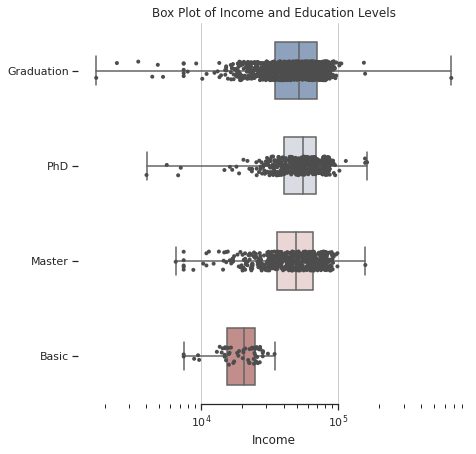

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 7))
ax.set_xscale("log")

planets = sns.load_dataset("planets")

sns.boxplot(x="Income", y="Education", data=df,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="Income", y="Education", data=df,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.title('Box Plot of Income and Education Levels');

Now we calculates the total numbers of each education levels in order to follow-up calculation.

In [ ]:
Bas_count = 0
Grad_count = 0
Mas_count = 0
PhD_count = 0

for i in df['Education']:
  if i == 'Basic':
    Bas_count += 1
  elif i == 'Graduation':
    Grad_count += 1
  elif i == 'Master':
    Mas_count += 1
  elif i == 'PhD':
    PhD_count += 1

**Overview of Product Categories and Education Levels**

In [ ]:
wine = df.groupby(by = ['Education']).sum()['MntWines'].to_frame().rename(columns = {'MntWines' : 'Wines'})
fruit = df.groupby(by = ['Education']).sum()['MntFruits'].to_frame().rename(columns = {'MntFruits' : 'Fruits'})
meat = df.groupby(by = ['Education']).sum()['MntMeatProducts'].to_frame().rename(columns = {'MntMeatProducts' : 'Meats'})
fish = df.groupby(by = ['Education']).sum()['MntFishProducts'].to_frame().rename(columns = {'MntFishProducts' : 'Wines'})
sweet = df.groupby(by = ['Education']).sum()['MntSweetProducts'].to_frame().rename(columns = {'MntSweetProducts' : 'Sweets'})
gold = df.groupby(by = ['Education']).sum()['MntGoldProds'].to_frame().rename(columns = {'MntGoldProds' : 'Gold'})

product_df = pd.concat([wine, fruit, meat, fish, sweet, gold], axis = 1)
display(product_df.transpose())

Education,Basic,Graduation,Master,PhD
Wines,391,320371,163446,195830
Fruits,600,34683,13884,9600
Meats,618,202284,89112,81379
Wines,921,48630,21502,12886
Sweets,654,35351,14784,9764
Gold,1233,57307,24339,15479


Here we calculate the amount spent for each person by product categories.

In [ ]:
b_df = (product_df.transpose()['Basic']/Bas_count).to_frame()
g_df = (product_df.transpose()['Graduation']/Grad_count).to_frame()
m_df = (product_df.transpose()['Master']/Mas_count).to_frame()
p_df = (product_df.transpose()['PhD']/PhD_count).to_frame()
productperson_df = pd.concat([b_df, g_df, m_df, p_df], axis = 1)
display(productperson_df)

**Purchase Amount Per Person by Product Category**

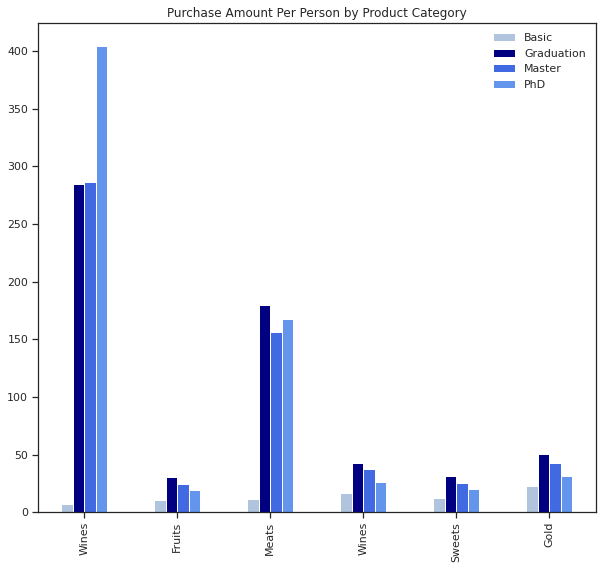

In [ ]:
productperson_df.plot(kind = 'bar', color = ['lightsteelblue', 'navy', 'royalblue', 'cornflowerblue'], 
                            figsize = (10, 9), title = 'Purchase Amount Per Person by Product Category');

Here we calculate the total amount spent on all the categories to see the relationship with education levels.

In [ ]:
sum_df = productperson_df.sum().to_frame("Total_amount")
y = list(sum_df['Total_amount'])
display(sum_df)

,Total_amount
Basic,81.796296
Graduation,619.898846
Master,572.796848
PhD,669.975258


**Pie Chart Showing the Proportions of Education Levels**

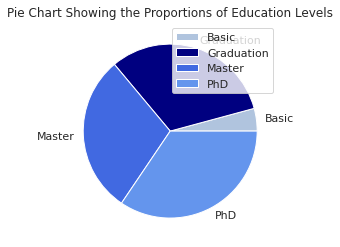

In [ ]:
plt.title("Pie Chart Showing the Proportions of Education Levels")
plt.pie(y, colors=['lightsteelblue', 'navy', 'royalblue', 'cornflowerblue'], 
        labels=['Basic','Graduation','Master','PhD'], radius = 1.0)
plt.legend(frameon=True);

**Overview of Relationship Between Purchase Numbers and Education Levels**

In [ ]:
Discount = df.groupby(by = ['Education']).sum()['NumDealsPurchases'].to_frame().rename(columns = {'NumDealsPurchases' : 'Discount'})
Web = df.groupby(by = ['Education']).sum()['NumWebPurchases'].to_frame().rename(columns = {'NumWebPurchases' : 'Web'})
Catalog = df.groupby(by = ['Education']).sum()['NumCatalogPurchases'].to_frame().rename(columns = {'NumCatalogPurchases' : 'Catalog'})
Store = df.groupby(by = ['Education']).sum()['NumStorePurchases'].to_frame().rename(columns = {'NumStorePurchases' : 'Store'})
Month_Webvisits = df.groupby(by = ['Education']).sum()['NumWebVisitsMonth'].to_frame().rename(columns = {'NumWebVisitsMonth' : 'Month_Webvisits'})

Num_df = pd.concat([Discount, Web, Catalog, Store, Month_Webvisits], axis = 1)

b_person = (Num_df.transpose()['Basic']/Bas_count).to_frame()
g_person = (Num_df.transpose()['Graduation']/Grad_count).to_frame()
m_person = (Num_df.transpose()['Master']/Mas_count).to_frame()
p_person = (Num_df.transpose()['PhD']/PhD_count).to_frame()
Numperson_df = pd.concat([b_person, g_person, m_person, p_person], axis = 1)

display(Numperson_df)

,Basic,Graduation,Master,PhD
Discount,1.796296,2.309672,2.367776,2.377320
Web,1.888889,4.125111,3.933450,4.424742
Catalog,0.481481,2.725821,2.488616,2.962887
Store,2.851852,5.829636,5.772329,6.065979
Month_Webvisits,6.870370,5.287489,5.278459,5.268041


**Purchase Numbers and Education Levels**

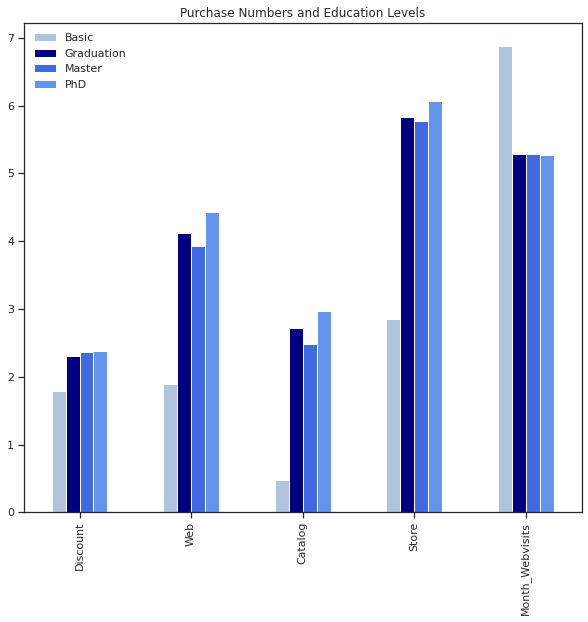

In [ ]:
Numperson_df.plot(kind = 'bar', color = ['lightsteelblue', 'navy', 'royalblue', 'cornflowerblue'], 
                                 figsize = (10, 9), title = 'Purchase Numbers and Education Levels');

**Heatmap of Correlations Between the Variables**

Text(0.5, 1.0, 'Heatmap of Correlations Between the Variables')

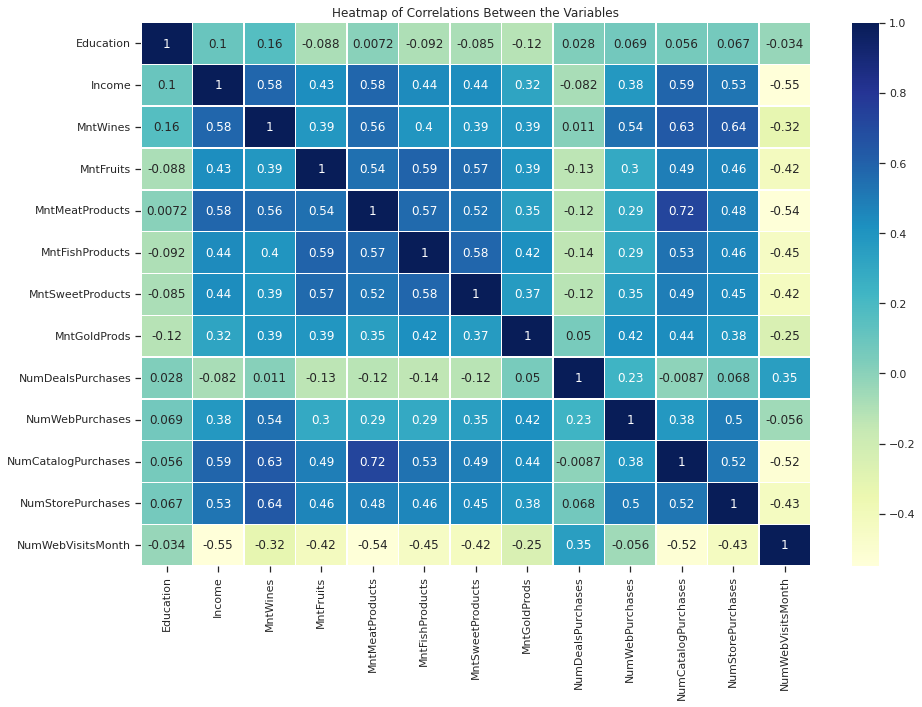

In [ ]:
new_col = ['Education', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
           'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
new_df = df[new_col]
education_nums = {"Education": {"Basic": 0, "Graduation": 1, "Master": 2, "PhD": 3}}
new_df = new_df.replace(education_nums)
new_df.reset_index(drop = True, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax).set_title('Heatmap of Correlations Between the Variables')

### Country

Here we first do some preparation.

In [ ]:
df.groupby('Country').size()/df.shape[0]

Country
AUS    0.071524
CA     0.119803
GER    0.053643
IND    0.065713
ME     0.001341
SA     0.150201
SP     0.489048
US     0.048726
dtype: float64

In [ ]:
df = df[df['Country'] != 'ME']

**Count Plot by Country**

Text(0.5, 1.0, 'Count Plot by Country')

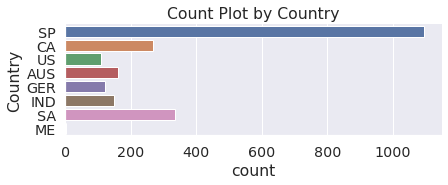

In [ ]:
sns.catplot(y="Country", kind="count", data=df, height=2.6, aspect=2.5)
plt.title('Count Plot by Country')

**Age Counts by Country**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Age Counts by Country')

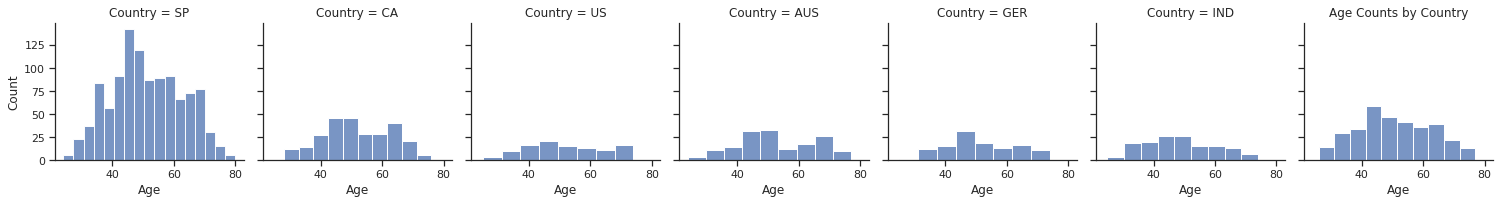

In [ ]:
df['Age'] = 2020 - df['Year_Birth']

g = sns.FacetGrid(df, col="Country")
g.map(sns.histplot, "Age")
plt.title('Age Counts by Country')

Here we applt aggregate functions to get the variables grouped by country needed.

In [ ]:
df2 = df.groupby("Country").agg(
  NumDealsPurchases=pd.NamedAgg(column='NumDealsPurchases', aggfunc='sum'),
  NumWebPurchases=pd.NamedAgg(column='NumWebPurchases', aggfunc='sum'),
  NumCatalogPurchases=pd.NamedAgg(column='NumCatalogPurchases', aggfunc='sum'),
  NumStorePurchases=pd.NamedAgg(column='NumStorePurchases', aggfunc='sum'),
  NumWebVisitsMonth=pd.NamedAgg(column='NumWebVisitsMonth', aggfunc='sum'))
df2 = df2.reset_index()
df2

,Country,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,AUS,362,654,419,879,827
1,CA,644,1154,735,1568,1417
2,GER,258,477,332,721,621
3,IND,364,582,364,783,809
4,SA,814,1396,917,1986,1778
5,SP,2468,4378,2843,6348,5819
6,US,288,484,331,658,610


**Bar Chart of Relevant Variables by Country**

Text(0.5, 1.0, 'Bar Chart of Deals Purchase Numbers by Country')

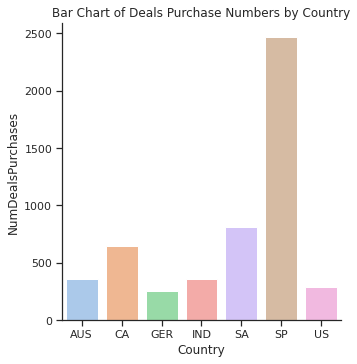

In [ ]:
sns.catplot(x = 'Country', y="NumDealsPurchases", kind="bar", palette="pastel", data=df2)
plt.title('Bar Chart of Deals Purchase Numbers by Country')

Text(0.5, 1.0, 'Bar Chart of Web Purchase Numbers by Country')

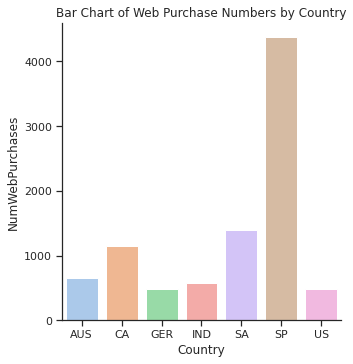

In [ ]:
sns.catplot(x = 'Country', y="NumWebPurchases", kind="bar", palette="pastel", data=df2)
plt.title('Bar Chart of Web Purchase Numbers by Country')

Now we calculate the response rates grouped by country.

In [ ]:
response_sum = df.groupby(['Country']).agg({'Response': 'sum'})
response_count = df.groupby(['Country']).agg({'Response': 'count'})

response_rate = response_sum / response_count
response_rate = response_rate.reset_index()
response_rate = response_rate.sort_values(by = 'Response',ascending=False)
response_rate

,Country,Response
5,SP,0.160878
4,SA,0.154762
0,AUS,0.143750
1,CA,0.141791
2,GER,0.141667
6,US,0.119266
3,IND,0.088435


**Bar Chart of Reponses Grouped by Country**

Text(0.5, 1.0, 'Bar Chart of Reponses Grouped by Country')

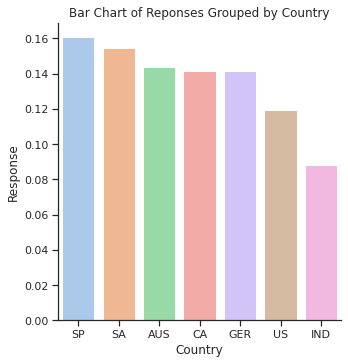

In [ ]:
sns.catplot(x = 'Country', y="Response", kind="bar", palette="pastel", data=response_rate)
plt.title('Bar Chart of Reponses Grouped by Country')

## 3. Customer Persona


1. About 50% of the sale comes form Spain and 50% of the customer are from Spain.
2. 95% of the cumstomers have at least Bacherlor degree, therefore, the company's customers are highly educated.
3. Almost 50% of the customers have no kid.
4. 80% of the customer have income that ranges from 25k to 80k.
5. On average, customers spend 78% of their spending on Wines and Meat


## 3. Suggestions